# Lab 6 - Data Visualization with Seaborn

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mp

## NFL Offense Data

1. Import the NFL week 3-7 data and add a week column to dataset and set the value to the given week (e.g. 3 )for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Next, merge the division and abbreviation data to this dataframe so that the division and conference info is included (using  team_colors_logos.csv or nfl_teams.csv).

In [89]:
df3 = pd.read_csv("nfloffenseweek3.csv")
df3['week'] = 3
df4 = pd.read_csv("nfloffenseweek4.csv")
df4['week'] = 4
df5 = pd.read_csv("nfloffenseweek5.csv")
df5['week'] = 5
df6 = pd.read_csv("nfloffenseweek6.csv")
df6['week'] = 6
df7 = pd.read_csv("nfloffenseweek7.csv")
df7['week'] = 7
#teams = pd.read_csv("nfl_teams.csv")
#teams.columns = ['ID', 'team', 'abbr', 'Conference', 'Division']
abbrs = pd.read_csv("teams_colors_logos.csv")
abbrs.columns = ['Abbreviation', 'team', 'team_id', 'team_nick', 'Conference', 'conf_division', 'team_color', 'team_color2', 'team_color3', 'team_color4', 'team_logo_wikipedia', 'team_logo_espn', 'team_wordmark', 'team_conference_logo', 'team_league_logo', 'team_logo_squared']
df_all = df3.merge(df4, how='outer').merge(df5, how='outer').merge(df6, how='outer').merge(df7, how='outer').merge(abbrs)
df_all

,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,...,team_color,team_color2,team_color3,team_color4,team_logo_wikipedia,team_logo_espn,team_wordmark,team_conference_logo,team_league_logo,team_logo_squared
0,1,Baltimore Ravens,3,99,1141,166,6.9,3,1,55,...,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
1,3,Baltimore Ravens,4,119,1437,230,6.2,5,1,77,...,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
2,4,Baltimore Ravens,5,138,1762,291,6.1,6,1,99,...,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
3,4,Baltimore Ravens,6,158,2168,349,6.2,8,2,122,...,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
4,3,Baltimore Ravens,7,181,2422,412,5.9,9,3,139,...,#241773,#9E7C0C,#9e7c0c,#c60c30,https://upload.wikimedia.org/wikipedia/en/thum...,https://a.espncdn.com/i/teamlogos/nfl/500/bal.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,32,Indianapolis Colts,3,40,994,207,4.8,6,2,61,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
161,32,Indianapolis Colts,4,57,1359,270,5.0,9,4,82,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
162,32,Indianapolis Colts,5,69,1665,343,4.9,11,4,101,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...
163,25,Indianapolis Colts,6,103,2099,417,5.0,11,4,130,...,#002C5F,#a5acaf,#013369,#9ba1a2,https://upload.wikimedia.org/wikipedia/commons...,https://a.espncdn.com/i/teamlogos/nfl/500/ind.png,https://github.com/nflverse/nflverse-pbp/raw/m...,https://github.com/nflverse/nflverse-pbp/raw/m...,https://raw.githubusercontent.com/nflverse/nfl...,https://github.com/nflverse/nflverse-pbp/raw/m...


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

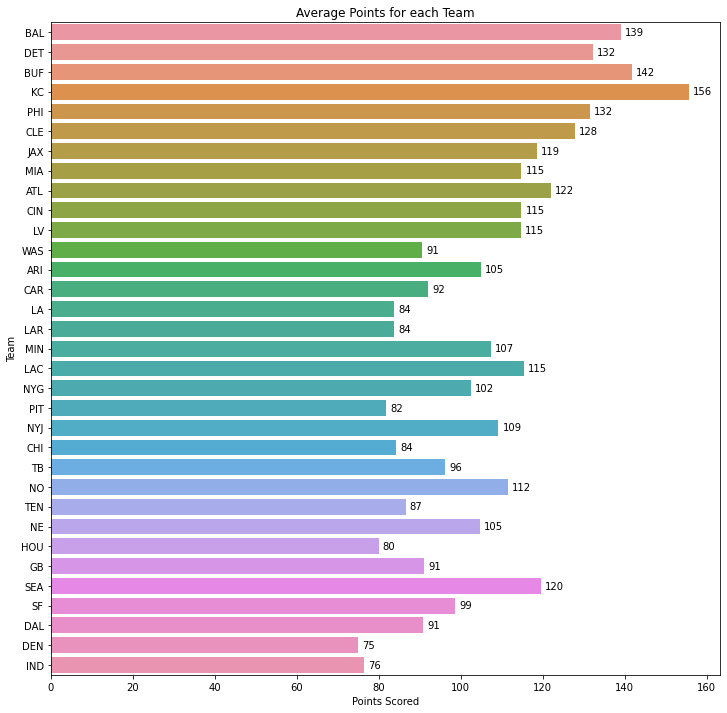

In [95]:
plt.figure(figsize=(12, 12))
ax = sns.barplot(x='points_scored', y='Abbreviation', data = df_all, ci=None)
ax.set(title='Average Points for each Team', xlabel='Points Scored', ylabel='Team')
#plt.bar_label(bar, df_all.groupby('Abreviation').points_scored.mean().values())
#df_all.groupby('Abbreviation').points_scored.mean()
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    ax.text(x = width + 1, 
    y = p.get_y() + (height/2),
    s = '{:.0f}'.format(width), va = 'center')


3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

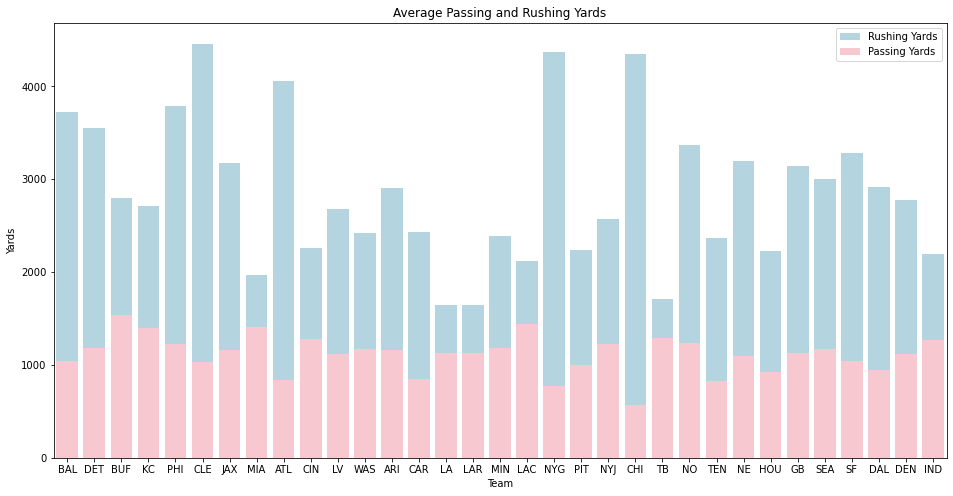

In [67]:
plt.figure(figsize=(16, 8))
bar1 = sns.barplot(x="Abbreviation", y='rushing_yards', data=df_all, ci=None,estimator=sum, color='lightblue')
bar2 = sns.barplot(x='Abbreviation', y='passing_yards', data=df_all, ci=None, color='pink').set(title='Average Passing and Rushing Yards', xlabel= 'Team', ylabel='Yards')
plt.legend(labels= ['Rushing Yards', 'Passing Yards'])
#df_all.groupby('Abbreviation').passing_yards.mean()

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

[Text(0.5, 1.0, 'Avg Total Yards vs Avg 1st Downs'),
 Text(0.5, 0, '1st Downs'),
 Text(0, 0.5, 'Total Yards')]

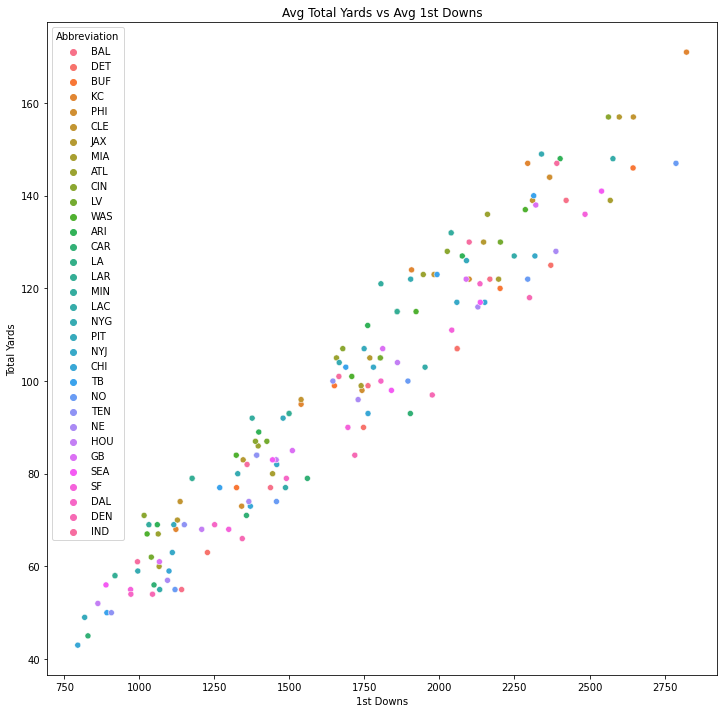

In [68]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x='total_yards', y='1st_downs', data=df_all, hue='Abbreviation').set(title='Avg Total Yards vs Avg 1st Downs', xlabel= '1st Downs', ylabel='Total Yards')

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

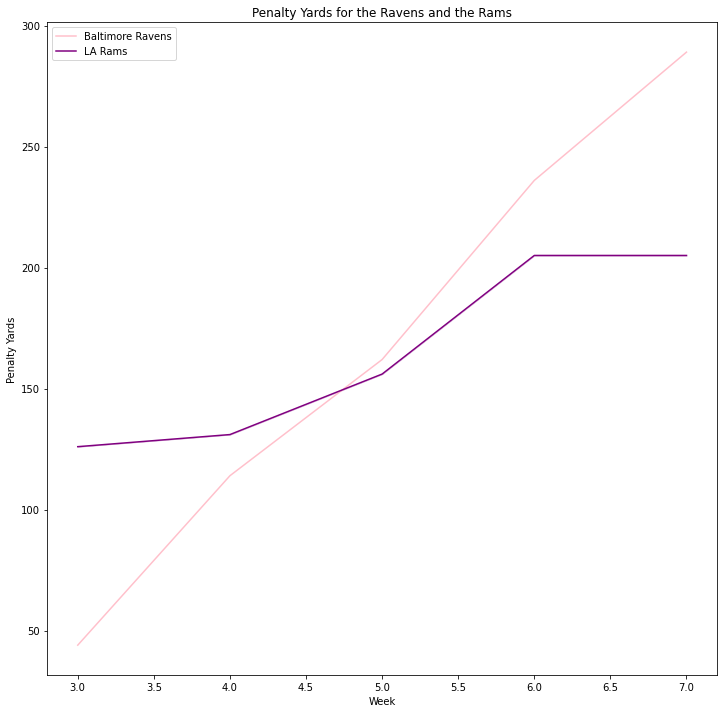

In [96]:
#ravens_rams = df_all[(df_all.team == 'Baltimore Ravens') | (df_all.team == 'Los Angeles Rams')]
#sns.lineplot(x='week', y='penalty_yards', data=ravens_rams)
plt.figure(figsize=(12, 12))
ravens = df_all[(df_all.team == 'Baltimore Ravens')]
sns.lineplot(x='week', y='penalty_yards', data=ravens, color='pink')
rams = df_all[(df_all.team == 'Los Angeles Rams')]
sns.lineplot(x='week', y='penalty_yards', data=rams, color='purple').set(title='Penalty Yards for the Ravens and the Rams', xlabel= 'Week', ylabel = 'Penalty Yards')
plt.legend(labels= ['Baltimore Ravens', 'LA Rams'])

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

[Text(0.5, 1.0, 'Avg Total Points vs Avg Yards per Play'),
 Text(0.5, 0, 'Yards per Play'),
 Text(0, 0.5, 'Total Points')]

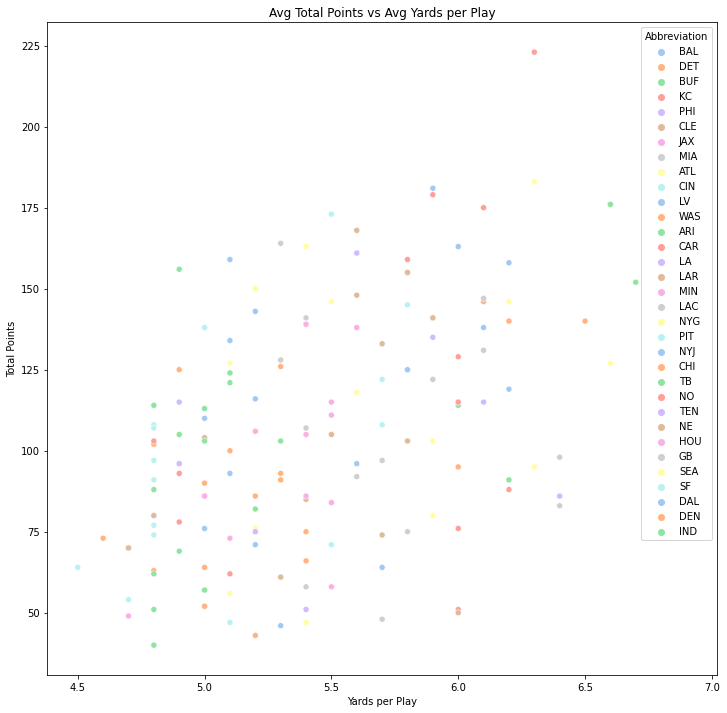

In [71]:
plt.figure(figsize=(12, 12))
sns.scatterplot(x='yards_per_play', y='points_scored', data=df_all, hue='Abbreviation', palette='pastel').set(title='Avg Total Points vs Avg Yards per Play', xlabel='Yards per Play', ylabel='Total Points')

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

[Text(0.5, 1.0, 'NFC West Penalty Yards by Week'),
 Text(0.5, 0, 'NFC West Teams'),
 Text(0, 0.5, 'Yards')]

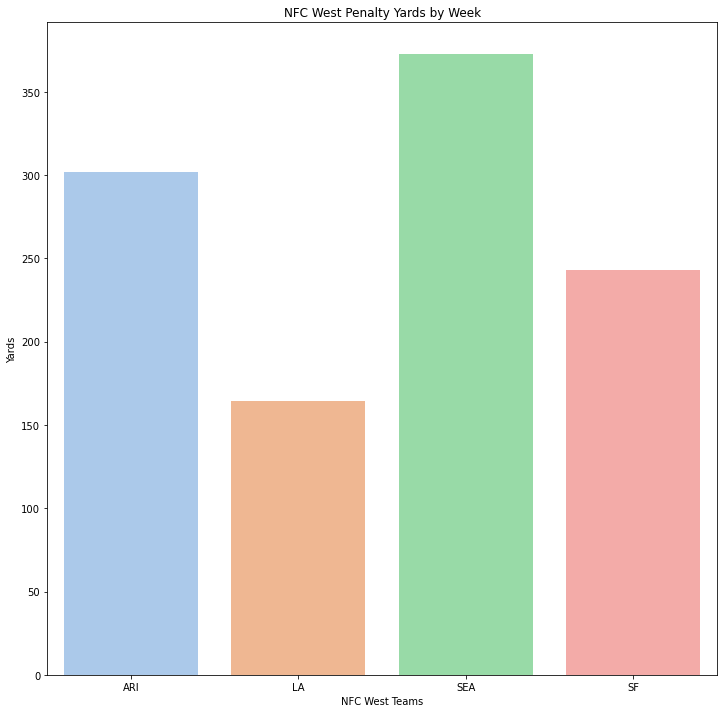

In [91]:
plt.figure(figsize=(12, 12))
nfc_west = df_all[(df_all.conf_division == 'NFC West') & (df_all.Abbreviation != 'LAR')]
sns.barplot(x='Abbreviation', y='penalty_yards', data=nfc_west, ci=None).set(title='NFC West Penalty Yards by Week',xlabel = 'NFC West Teams', ylabel = 'Yards')

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

[Text(0.5, 1.0, 'Avg Weekly Points by Conference and Division'),
 Text(0.5, 0, 'Points'),
 Text(0, 0.5, 'Conference/Division')]

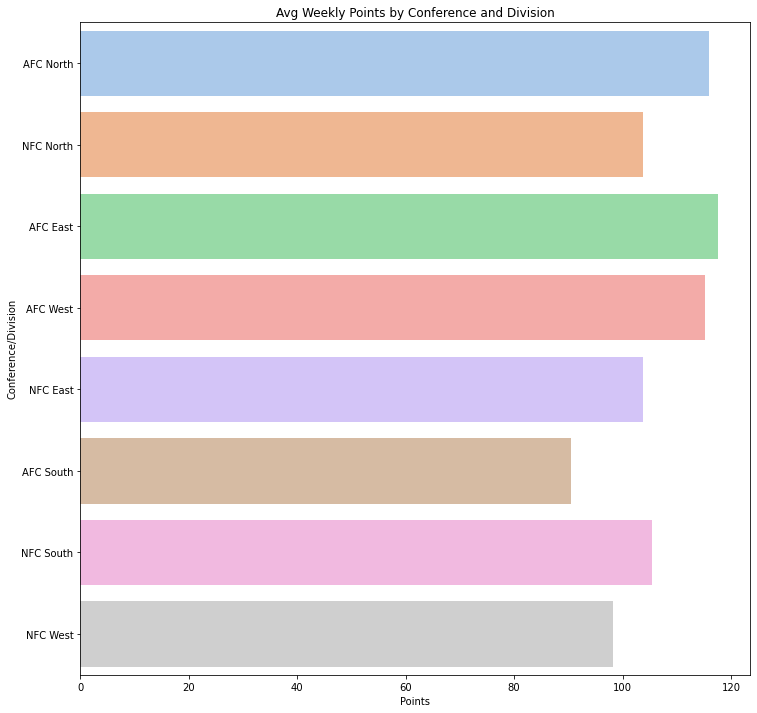

In [ ]:
plt.figure(figsize=(12, 12))
#total_pts = (df_all.groupby('conf_division').points_scored.mean())
sns.barplot(x=df_all.points_scored, y='conf_division', data=df_all, estimator=np.mean, ci=None).set(title='Avg Weekly Points by Conference and Division', xlabel='Points', ylabel='Conference/Division')
